In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import neattext as nt

In [2]:
df = pd.read_csv('emotion_dataset_raw.csv')

In [3]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [5]:
df['Emotion'].unique()

array(['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame',
       'disgust'], dtype=object)

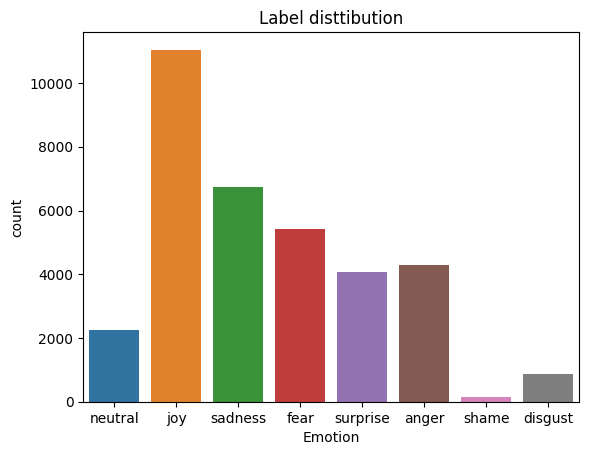

In [6]:
# checking distribution of emotions
plt.title("Label disttibution")
sns.countplot(data=df , x='Emotion' )
plt.show()

## Data Cleaning 

In [7]:
df['clean_text'] = df['Text'].apply(lambda x : x.lower())
df['clean_text'] = df['clean_text'].apply(nt.remove_stopwords)
df['clean_text'] = df['clean_text'].apply(nt.remove_userhandles)

In [8]:
df.head()

,Emotion,Text,clean_text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,sage act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,way homegirl baby funeral!!! man hate funerals...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga a...


## Model Building`

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from xgboost import  XGBRFClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score , f1_score , recall_score

In [10]:
X = df['clean_text']
y = df['Emotion']

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=9 , train_size=0.8)

In [12]:
pipe = Pipeline([
    ('step1' , CountVectorizer()),
    ('step2' , LogisticRegression())
])

In [13]:
pipe.fit(X_train , y_train)

C:\Users\windows\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('step1', CountVectorizer()), ('step2', LogisticRegression())])

In [14]:
y_pred = pipe.predict(X_test)

In [15]:
print("accuracy : " , accuracy_score(y_test , y_pred))

accuracy :  0.6396033912918523


## Exporting model

In [16]:
import pickle

pickle.dump(pipe ,open("model.pkl" , "wb") )